In [2]:
##2.1模型性能验证
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine#导入红酒数据集

In [3]:
wine = load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
#红酒数据集的大小
wine.data.shape

(178, 13)

In [6]:
#红酒数据集的分类标签
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
#将数据用表格的形式表现出来
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
#特征名字，看起来会容易一些
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
#实例化
#训练集代入实例化后的模型去进行训练，使用的接口是fit
#使用其它接口将测试集导入我们训练的模型，去获取我们希望获取的结果(score,Y_test)

In [10]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

#实例化决策树
clf = DecisionTreeClassifier(random_state=0)
#实例化随机森林
rfc = RandomForestClassifier(random_state=0)

#导进去训练
clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

#score其实就是accuracy
score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

#输出两者的准确率，进行对不
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))

Single Tree:0.8703703703703703 Random Forest:0.9629629629629629


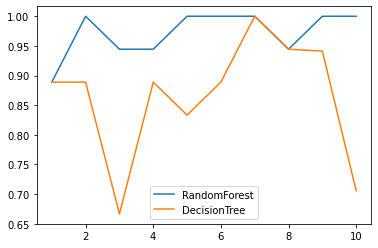

In [11]:
#交叉验证：cross_val_score,不用自己分测试集和训练集

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)#10份，1份训练集，9份测试集

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='DecisionTree')
plt.legend()
plt.show()

#在10次交叉验证，随机森林准确率大于等于决策树

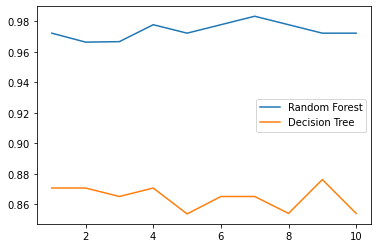

In [12]:
#画出随机森林和决策树在十组交叉验证下的效果对比
rfc_1 = []
clf_1 = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11),rfc_1,label='Random Forest')
plt.plot(range(1,11),clf_1,label='Decision Tree')
plt.legend()
plt.show()

#单个决策树的波动轨迹和随机森林一致
#再次验证了我们之前提到的，单个决策树准确率越高，随机森林准确率越高
#100次交叉验证，随着训练次数越来越多，随机森林的效果比决策树好的越来越多

0.9888888888888889 12


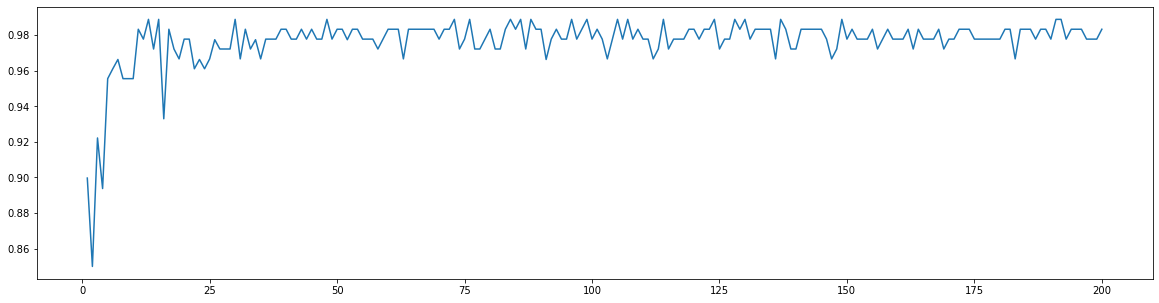

In [24]:
#n_estimator学习曲线，Time warning--5min
superpa = [] #200次在随机森林上的不同交叉验证的结果
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
#index返回对象在列表当中的索引
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

#随着n_estimator上升，随机森林效果越来越好，表示森林中的树木的数量是12的时候取到的

In [1]:
##2.2  两个重要属性random_state和oob_score_
#ran
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()
# 25颗树，每棵树错误的概率为0.2，则25颗树判错的概率为多少？实现公式

0.00036904803455582827

In [13]:
#随机森林random_state形成的是不同的模式,想保持树的稳定，可以设置random_state值
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

#随机森林的重要属性之一：estimators_，查看森林中树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [16]:
#查看某一棵树的状况,返回第0棵树的randomstate值
rfc.estimators_[0].random_state

1872583848

In [17]:
#查看每一棵树的random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [18]:
#bootstrap
'''
袋装法正是通过有效果的随机抽样技术来形成不同的数据，
bootstrap就是用来控制抽样技术的参数，代表有放回的随机抽样，默认参数True
一个自助集里，只要n次中有一次抽到这个样本，这个样本就算是被抽到，但是这样很难计算
不妨使用逆向思维
如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，
训练完毕之后，我们可以用随机森林的另一个重要属性：oob_score_来查看我们的在袋外数据上测试的结果
'''
#在使用随机森林时，可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可

rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
#实例化
rfc = rfc.fit(wine.data,wine.target)
#重要属性oob_score_，袋外数据在随机森林上预测出来的数据（进行训练的得分）
rfc.oob_score_

0.9606741573033708

In [28]:
#四个常用接口：apply,fit,predict和score
#实例化和得分
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

1.0

In [29]:
#特征重要性数值，数值越大，特征越重要
rfc.feature_importances_

array([0.14899162, 0.02924581, 0.0165867 , 0.02424757, 0.04416315,
       0.04424121, 0.13484233, 0.00908079, 0.02613006, 0.17598283,
       0.06193533, 0.10760285, 0.17694976])

In [32]:
#测试集中每一个样本在每一棵书中的叶子结点的索引
rfc.apply(Xtest)

array([[20, 16, 10, ..., 14,  7, 10],
       [ 6, 12,  3, ..., 14, 10,  3],
       [ 8,  4,  7, ...,  7,  1,  1],
       ...,
       [20, 16, 10, ..., 14,  7, 10],
       [14, 12,  3, ..., 10,  4,  3],
       [14, 12,  3, ..., 14, 10,  3]], dtype=int64)

In [33]:
#输入测试集，返回对测试集预测的值
rfc.predict(Xtest)

array([0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 0, 0, 2, 2])

In [34]:
#每一个样本对应的每一个标签的概率
rfc.predict_proba(Xtest)

array([[1.  , 0.  , 0.  ],
       [0.12, 0.16, 0.72],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.96, 0.  , 0.04],
       [0.8 , 0.2 , 0.  ],
       [0.04, 0.92, 0.04],
       [0.64, 0.36, 0.  ],
       [0.  , 0.88, 0.12],
       [0.12, 0.84, 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.24, 0.76],
       [0.  , 0.12, 0.88],
       [0.  , 0.44, 0.56],
       [0.  , 0.04, 0.96],
       [0.  , 0.12, 0.88],
       [0.04, 0.04, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.64, 0.36, 0.  ],
       [0.16, 0.8 , 0.04],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.12, 0.24, 0.64],
       [0.68, 0.28, 0.04],
       [0.76, 0.2 , 0.04],
       [0.  , 0.2 , 0.8 ],
       [0.96, 0.  , 0.04],
       [0.04, 0.96, 0.  ],
       [0.  , 0.16, 0.84],
       [0.04, 0.88, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.8 , 0.2 , 0.  ],
 

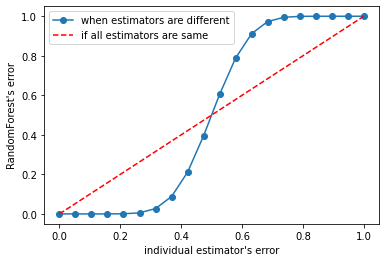

In [35]:
#袋装法还有另一个必要条件：基分类器的判断准确率至少要超过随机分类器，
#就是说，基分类器（单个树）的判断准确率至少要超过50%
#使用随机森林之前，一定要检查用来组成随机森林的分类树们是否都有至少50%的预测正确率
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()
